Name - Taha Juzer Husain

Student ID - 20231431

# Part 1

In the first part, I have implemented logistic regression using stochastic gradient descent.
Logistic regression is use to fit a line that can linearly seperate the data into classes.
Working of algorithm is as follows :
- Initally, we randomly assign weights and bias
- Using gradient descent, we try to minimize the cost and learn weights which can seperate the data
- In gradient descent, we calculate the weighted sum of the input and weights and pass it to the activation funciton.
- The activation function returns a value between zero and one which helps us to calculate the class or y value.
- Using the value returned by the activation function we calculate the loss using log of y and log of y predicted.
- For calculating loss, log loss method is used to calculate log value of the y_predicted.
- After calculating loss, we calculate the partial deriavative of loss with respect to weight and update the weight with the help of learning rate. Learning rate helps the model to run and decrease the loss.

#### References
- Lecture notes.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

### Implementing logistic regression

In [2]:
"""
Implementing logistic regression using stochastic gradient descent. The weights are updated using 
partial deriavatives of cost with respect to weight and bias.
"""

class Logictic_Regression_NN():

    """
    initializing values for future use.
    """
    def __init__(self, max_iterations = 1000, learning_rate = 0.01):
        self.weights = None
        self.bias = np.random.uniform(0, 1)
        self.loss_threshold = 1e-6
        self.max_iterations = max_iterations
        self.learning_rate = learning_rate
        self.mean = None
        self.sd = None

    """
    scaler is used to scale the data using the mean and standard deviation
    """

    def my_standard_scaler(self, data):
        d = np.array(data)
        self.mean = np.mean(d, axis = 0)
        self.sd = np.std(d, axis = 0)
        new_data = (d - self.mean) / self.sd
        return new_data
    
    def scale_transform(self, data):
        d = np.array(data)
        new_data = (d - self.mean) / self.sd
        return new_data
    
    def scale(self, scale_input):
        scaler = StandardScaler()
        scale_output = scaler.fit_transform(scale_input)
        return scale_output
        
    """
    fit method is used learn the weight and bias by using stochastic gradient descent,
    """
    
    def fit(self, X, y, x_validation, y_validation):
        self.weights = np.random.normal(0,0.01,X.shape[1])
        self.weights, self.bias = self.gradient_descent(X, y, x_validation, y_validation, self.max_iterations, self.learning_rate)    
        accuracy_train = self.accuracy(X, y)
        print(f"Accuracy : {accuracy_train}")
    """
    Gradient descent is used to learn the values of weight and bias and to check loss value until it converges.
    log loss function is used and partial deriavative of the same is used to update the weights
    """
  
    def gradient_descent(self, X, y, x_validation, y_validation, max_iterations, learning_rate):
        
        loss_prev = 0
        acc = 0
        for i in range(max_iterations):
            index = np.random.randint(X.shape[0])
            ## running forward pass
            w_sum = np.dot(X[index], self.weights) + self.bias
            y_hat = self.sigmoid(w_sum)
            loss_prev = self.log_loss(y[index], y_hat)
            
            # calculating deriavative for weight and bias
            w_der = (y_hat - y[index]) * X[index]
            b_der = (y_hat - y[index])
            
            # updating weights and bias
            self.weights = self.weights - learning_rate * w_der
            self.bias = self.bias - learning_rate * b_der
            
            acc_validation = self.accuracy(x_validation, y_validation)
            
            w_sum = np.dot(X[index], self.weights) + self.bias
            y_hat = self.sigmoid(w_sum)
            loss = self.log_loss(y[index], y_hat)
            
            # value of iteration is monitored and checked for early stopping. Only the best parameters
            # giving best results on the validation set are chosen. This helps in preventing 
            # overfitting of the model.
            
            if i % 1000 == 0:
                acc_validation = self.accuracy(x_validation, y_validation)
                if acc_validation > acc:
                    acc = acc_validation
                    saved_weights = self.weights
                    saved_bias = self.bias
                    
            if(self.loss_threshold > abs(loss_prev - loss)):
                break
                
        # using the saved weight and bias for future use    
        self.weights = saved_weights
        self.bias = saved_bias
        
        return self.weights, self.bias
    '''
    activation function used to convert the weighted sum in range of 0 and 1
    '''
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    '''
    calculating loss values with log_loss method. It calculates log value of the y_predicted.
    '''
    def log_loss(self, y, y_hat):
        loss = (y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
        return loss
    
    '''
    predict method is used for prediction by providing only the features
    '''
    def predict(self, X_predict):
        w_sum = np.dot(X_predict , self.weights) + self.bias
        y_predicted = self.sigmoid(w_sum)
        result = [max(0.5, y_predicted[i]) for i in range(len(y_predicted))]
        for i in range(len(result)):
            if(result[i] == 0.5):
                result[i] = 0
            else:
                result[i] = 1
        return result
    
    '''
    accuracy method returns score of how many examples in X are correctly predicted by the model by comparing 
    with the original y values
    '''
    def accuracy(self, X, y_original):
        score = 0
        y_predicted = self.predict(X)
        for i in range(len(y_predicted)):
            if(y_predicted[i] == y_original[i]):
                score += 1
        return (score/len(y_predicted))


# Part 2

In this part, I have tested two dataset on the above implementation. The first data is linearly sepearable and the other dataset(moons) is not. The difference in model performance can be seen on the datasets.

### Training on Blob dataset

In [3]:
## reading blob dataset in pandas
df_blob = pd.read_csv('blobs250.csv')

In [4]:
X_blob = df_blob[['X0', 'X1', 'X2']].values
y_blob = df_blob['Class'].values

In [5]:
# Splitting the data into train and test using sklearn library
from sklearn.model_selection import train_test_split
X_train_blob, X_test_blob, y_train_blob, y_test_blob = train_test_split(X_blob, y_blob, test_size= 0.2)

In [6]:
# dividing the validation data from the training data
X_train_blob, X_validation_blob, y_train_blob, y_validation_blob = train_test_split(X_train_blob, y_train_blob, test_size= 0.15)

In [7]:
# creating object of logisgtic regression class
model_blob = Logictic_Regression_NN(10000)

In [8]:
# scaling the data using standard scaling technique
X_train_blob_scaled = model_blob.my_standard_scaler(X_train_blob)
X_validation_blob_scaled = model_blob.scale_transform(X_validation_blob)
X_test_blob_scaled = model_blob.scale_transform(X_test_blob)

In [9]:
# training the model on the blob dataset which is linearly seperable
model_blob.fit(X_train_blob_scaled, y_train_blob, X_validation_blob_scaled, y_validation_blob)

Accuracy : 1.0


In [10]:
# testing the accuracy on test data
model_blob.accuracy(X_test_blob_scaled, y_test_blob)

1.0

### Training on moon dataset

In [11]:
# reading moons dataset using pandas
df_moons = pd.read_csv('moons400(1).csv')

In [12]:
X_moons = df_moons[['X0', 'X1']].values
y_moons = df_moons['Class'].values

In [13]:
from sklearn.model_selection import train_test_split
X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(X_moons, y_moons, test_size= 0.2)

In [14]:
# dividing the validation data from the training data
X_train_moons, X_validation_moons, y_train_moons, y_validation_moons = train_test_split(X_train_moons, y_train_moons, test_size= 0.15)

In [15]:
model_moon = Logictic_Regression_NN()

In [16]:
X_moons_train_scaled = model_moon.my_standard_scaler(X_train_moons)
X_validation_moons_scaled = model_moon.scale_transform(X_validation_moons)
X_moons_test_scaled = model_moon.scale_transform(X_test_moons)

In [17]:
scaler = StandardScaler()
X_moons_train_scaled = scaler.fit_transform(X_train_moons)
X_moons_test_scaled = scaler.fit_transform(X_test_moons)
X_validation_moons_scaled = scaler.fit_transform(X_validation_moons)

In [18]:
"""
Tuning hyper parameters by cross validating and checking performance on the validation dataset. 
In the below code, different learning rates and number of iterations are checked while training on the training data 
and evaluating it on the validation data.
Later the best parameters are chosen to train the model.
"""

learning_rates = [0.1, 0.01, 0.2, 0.02]
max_iterations = [1000, 5000, 10000]
best_accuracy = 0
best_parameters_logistic = ()
for lr in learning_rates:
    for iteration in max_iterations:
        model = Logictic_Regression_NN(max_iterations=iteration, learning_rate=lr)
        model.fit(X_moons_train_scaled, y_train_moons, X_validation_moons_scaled, y_validation_moons)
        accuracy = model.accuracy(X_validation_moons_scaled, y_validation_moons)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_parameters_logistic = (iteration, lr)
print(best_parameters_logistic)

Accuracy : 0.5
Accuracy : 0.5
Accuracy : 0.8786764705882353
Accuracy : 0.5
Accuracy : 0.8602941176470589
Accuracy : 0.8639705882352942
Accuracy : 0.5
Accuracy : 0.5
Accuracy : 0.5
Accuracy : 0.5
Accuracy : 0.8639705882352942
Accuracy : 0.875
(10000, 0.1)


In [19]:
model_moon = Logictic_Regression_NN(best_parameters_logistic[0], best_parameters_logistic[1])

In [20]:
model_moon.fit(X_moons_train_scaled, y_train_moons, X_validation_moons_scaled, y_validation_moons)

Accuracy : 0.875


In [21]:
model_moon.accuracy(X_moons_test_scaled, y_test_moons)

0.9125

## Observations

In the above datasets, the blob dataset gives 100% accuracy on training as well as testing data, which means it can correctly identify all the data. This is possible as it is linearly separable. On the moon dataset, the accuracy for training data is 87% whereas on the testing data it is 85%. I have also implemented **early stopping** to avoid any overfitting in the model. For every 1000 iterations the model checks for accuracy of the validation dataset and if the accuracy is higher than the last run it saves the parameters such as weight and bias. Once it completes all the iterations the last saved parameters which are best are than used to test the model. This helps in preventing overfit of the model and use the best parameters even if the model starts degrading in higher iterations.

# Part 3

In this part, I have implemented a shallow neural network with one hidden layer. The number of features and number of neurons are flexible and could be passsed as an argument to the fit method.

The algorithm used to implement shallow neural network is as follows:
- We start by initiating small values of weights and biases. I have used numpy methods to initialize values
    of weights and biases for the hidden layer and output layer.
- The algorithm uses stochastic gradient descent to learn the network parameters such as weights and biases.
- In stochastic gradient descent, we randomly choose one row from the input and run the forward pass and back propogation. The weights get updated in each iterations.
- The algorithm consist of two steps : 
    - Forward pass
    - back propogation
- Following are steps involved in forward pass:
    - weighted sum (z) is calculated by taking the sum of dot product of the input vector(x) and the weights(w) and the bias(b) $ z = x * w + b $ <BR>
    - z is passed through an activation function to calculate the probability of the output in case of binary classification. In below implementation, **sigmoid** is used as an activation function.
    - Output of the activation functions in the previous layer are used as inputs in next layer.
- Following steps are involved in back propogation:
    - Once the final output is calculated, we calculate the loss by using log loss method.
    - using the loss we calculate the deriavatives of the weights and biases in a back propogated way starting from final layer to the input layer.
    - once the deriavatives are calculated we update the weights and biases and run next iterations.
    
    

### shallow neural network implementation

In [22]:
class shallow_nn():
    """
    Initializing values for weights, bais and loss threshold
    """
    def __init__(self, learning_rate = 0.01):
        self.learning_rate = learning_rate
        self.weights = None
        self.bias = None
        self.neurons = 0
        self.loss_threshold = 1e-6
        self.mean = 0
        self.sd = 0
    
    """
    scaler is implemented to scale the data using the mean and standard deviation
    """
    def my_standard_scaler(self, data):
        d = np.array(data)
        self.mean = np.mean(d, axis = 0)
        self.sd = np.std(d, axis = 0)
        new_data = (d - self.mean) / self.sd
        return new_data
    
    
    def scale_transform(self, data):
        d = np.array(data)
        new_data = (d - self.mean) / self.sd
        return new_data
    
    """
    fit method is used to train the model. It accepts arguments such as x, y, x_validation,
    y_validation, number of neurons and max iterations. Default max iterations set are 10000.
    """
    def fit(self, X, y,x_validation, y_validation, neurons, max_iterations = 10000):
        self.neurons = neurons
        weight_temp = []
        activation = []
        # random weights are initialized in the start
        self.weights = np.random.normal(0,0.01, (neurons, X.shape[1]))
        self.bias = np.random.uniform(0, 1, neurons)
        self.output_weights = np.random.uniform(0, 0.01, neurons)
        self.output_bias = np.random.uniform(0, 1, 1)
        
        loss = self.sgd(X, y,x_validation, y_validation, max_iterations)
        plt.plot(loss)
        plt.show()
        acc = self.accuracy(X, y)
        print(f"Accuracy : {acc}, Loss {loss[-1]}")
    
    """
    sgd method is used to perform stochastic gradient descent using back propogation.
    Sigmoid is used as an activation function. Loss is calculated using log loss formula
    """
    def sgd(self, X, y, x_validation, y_validation, max_iterations):
        acc = 0
        loss_list = [] 
        loss_list_1 = []
        for i in range(max_iterations):
            
            index = np.random.randint(X.shape[0])
            X_sgd = np.array(X[index])
            y_sgd = np.array(y[index])
            
            #calculating weighted sum from input layer to hidden layer and passing
            # it to the activation function
            # peerforming forward pass
            w_sum = np.dot(X_sgd, self.weights.T) + self.bias
            activation = self.sigmoid(np.array(w_sum))
            
            ## calculating weighted sum from the hidden layer to the output layer
            w_sum_output = np.dot(np.array(activation), self.output_weights) + self.output_bias
            activation_output = self.sigmoid(w_sum_output)
            
            # calculating loss
            loss = self.log_loss(y[index], activation_output)
            
            loss_list.append(loss)
            
            if i % 1000 == 0:
                loss_list_1.append(np.mean(loss_list))
                loss_list = []
            
            # calculating deriavative for weight of output layer
            delta_w_sum_output = activation_output - y[index]
    
            delta_output_weight = delta_w_sum_output * activation
            delta_output_bias = delta_w_sum_output
            
            # taking deriavative of sigmoid and performing backpropogation
            der = self.sigmoid(w_sum) * (1 - self.sigmoid(w_sum))
            delta_w_sum = der * (delta_w_sum_output * self.output_weights)

            delta_w_sum_array = np.array(delta_w_sum)
            delta_w_sum_matrix = np.matrix(delta_w_sum)
            
            # calculating deriavatives for weights and biases
            delta_weight = delta_w_sum_matrix.T * X_sgd
            delta_bias = delta_w_sum_array
            delta_output_weight = np.array(delta_output_weight)
            delta_output_bias = np.array(delta_output_bias)
            
            # updating weights and biases
            self.weights -= (self.learning_rate * delta_weight)
            self.bias -= (self.learning_rate * delta_bias)
            self.output_weights -= (self.learning_rate * delta_output_weight)
            self.output_bias -= (self.learning_rate * delta_output_bias)
            
            # value of iteration is monitored and checked for early stopping. Only the best parameters
            # giving best results on the validation set are chosen. This helps in preventing 
            # overfitting of the model.
            
            if i % 1000 == 0:
                acc_validation = self.accuracy(x_validation, y_validation)
                if acc_validation > acc:
                    acc = acc_validation
                    saved_weights = self.weights
                    saved_bias = self.bias
                    saved_output_weights = self.output_weights
                    saved_output_bias = self.output_bias
        self.weights = saved_weights
        self.bias = saved_bias
        self.output_weights = saved_output_weights
        self.output_bias = saved_output_bias
            
        return  loss_list_1
    
    # predicting y based on x
    def predict(self, X_predict):
        w_sum = np.dot(X_predict, self.weights.T) + self.bias
        activation = self.sigmoid(np.array(w_sum))
        w_sum_output = np.dot(np.array(activation), self.output_weights) + self.output_bias
        result = self.sigmoid(w_sum_output)
        for i in range(len(result)):
            if(result[i] < 0.5):
                result[i] = 0
            else:
                result[i] = 1
        return result
    
    # calculating accuracy by comparing y predicted and y original
    def accuracy(self, X, y_original):
        score = 0
        y_predicted = self.predict(X)
        for i in range(len(y_predicted)):
            if(y_predicted[i] == y_original[i]):
                score += 1
        return (score/len(y_predicted))
    
    # loss function using log of y predicted
    def log_loss(self, y, y_hat):
        loss = (y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
        return loss
    
    # activation function
    def sigmoid(self, z):
        z = np.array(z)
        return 1 / (1 + np.exp(-z))

### Training on blob dataset

In [23]:
shallow_blob = shallow_nn()

In [24]:
from sklearn.model_selection import train_test_split
X_train_blob, X_test_blob, y_train_blob, y_test_blob = train_test_split(X_blob, y_blob, test_size= 0.2,random_state = True)

In [25]:
# dividing the validation data from the training data
X_train_blob, X_validation_blob, y_train_blob, y_validation_blob = train_test_split(X_train_blob, y_train_blob, test_size= 0.15)

In [26]:
# scaling the data using standard scaling technique
X_train_blob_scaled = shallow_blob.my_standard_scaler(X_train_blob)
X_validation_blob_scaled = shallow_blob.scale_transform(X_validation_blob)
X_test_blob_scaled = shallow_blob.scale_transform(X_test_blob)

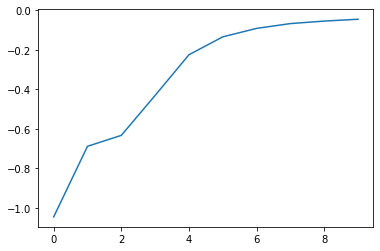

Accuracy : 1.0, Loss -0.04496133615823685


In [27]:
shallow_blob.fit(X_train_blob_scaled, y_train_blob, X_validation_blob_scaled, y_train_blob, 3)

In [28]:
shallow_blob.accuracy(X_test_blob_scaled, y_test_blob)

1.0

### Training on moons dataset

In [29]:
df_moons = pd.read_csv('moons400(1).csv')

In [30]:
X_moons = df_moons[['X0', 'X1']].values
y_moons = df_moons['Class'].values

In [31]:
#dividing train and test data
X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(X_moons, y_moons, test_size= 0.2, shuffle = True)

In [32]:
# dividing the validation data from the training data
X_train_moons, X_validation_moons, y_train_moons, y_validation_moons = train_test_split(X_train_moons, y_train_moons, test_size= 0.15)

In [33]:
model_moon = shallow_nn()

In [34]:
X_train_moons_scaled = model_moon.my_standard_scaler(X_train_moons)
X_validation_moons_scaled = model_moon.scale_transform(X_validation_moons)
X_test_moons_scaled = model_moon.scale_transform(X_test_moons)

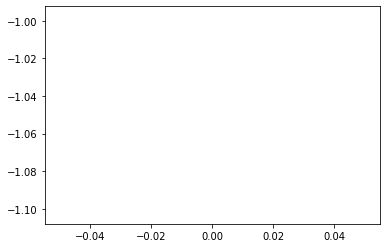

Accuracy : 0.8933823529411765, Loss -1.0501351007465156


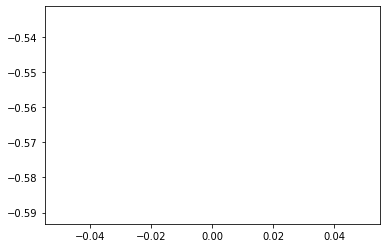

Accuracy : 0.8786764705882353, Loss -0.562276425313729


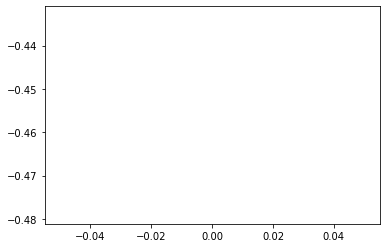

Accuracy : 0.875, Loss -0.456040819529408


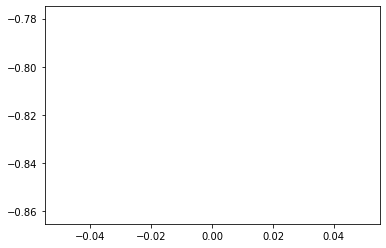

Accuracy : 0.8566176470588235, Loss -0.8200479117672698


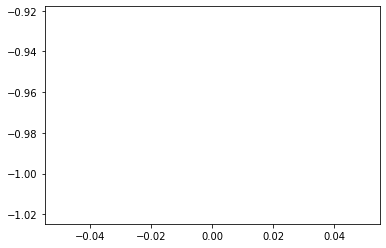

Accuracy : 0.4889705882352941, Loss -0.9712748731375197


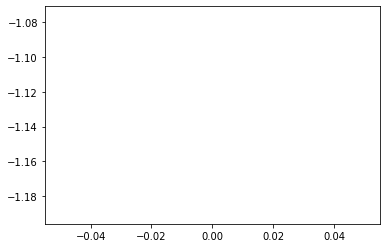

Accuracy : 0.5110294117647058, Loss -1.133413620926576


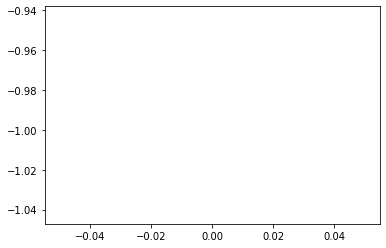

Accuracy : 0.5955882352941176, Loss -0.9925184513670908


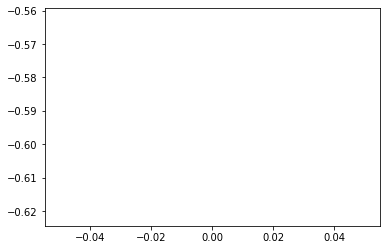

Accuracy : 0.5110294117647058, Loss -0.5918659402966828


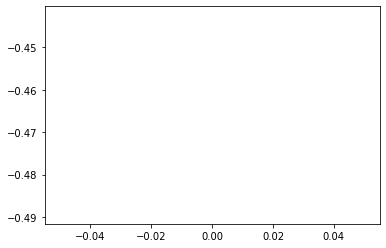

Accuracy : 0.8823529411764706, Loss -0.46597456668738735


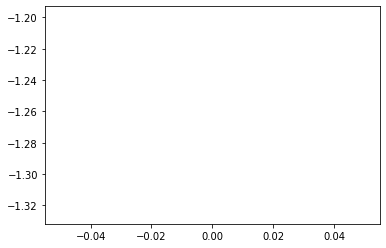

Accuracy : 0.8897058823529411, Loss -1.2623713630754898


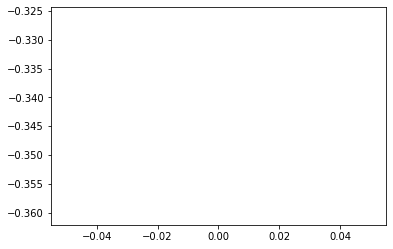

Accuracy : 0.9044117647058824, Loss -0.34325438364007127


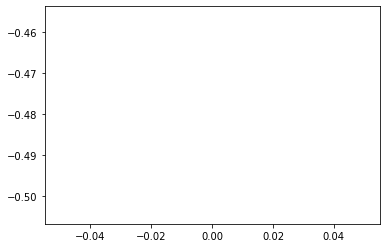

Accuracy : 0.9044117647058824, Loss -0.48024812842099235


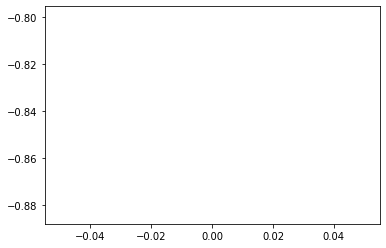

Accuracy : 0.8639705882352942, Loss -0.8416425657541264


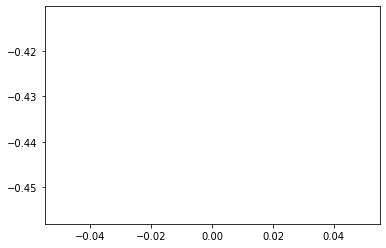

Accuracy : 0.6948529411764706, Loss -0.4341116432224256


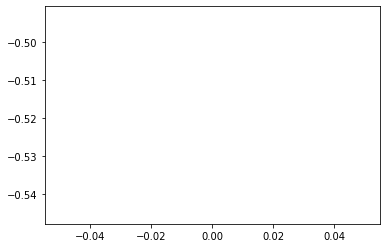

Accuracy : 0.4889705882352941, Loss -0.519229636247586


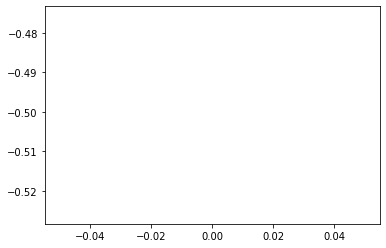

Accuracy : 0.5808823529411765, Loss -0.5008279785711162


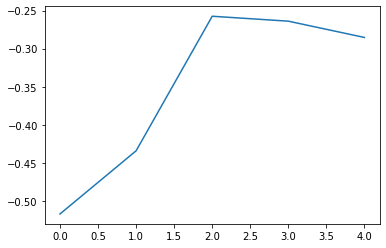

Accuracy : 0.9044117647058824, Loss -0.28534632373499713


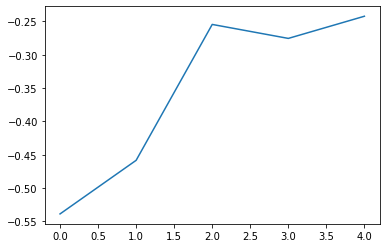

Accuracy : 0.9080882352941176, Loss -0.2422179899379596


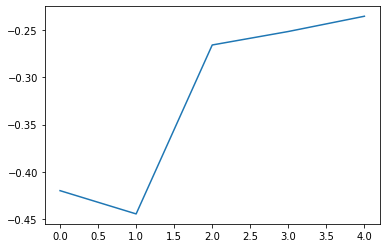

Accuracy : 0.8897058823529411, Loss -0.23507038332610147


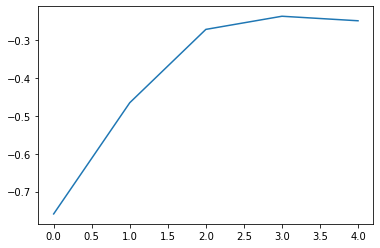

Accuracy : 0.9044117647058824, Loss -0.24903131291514363


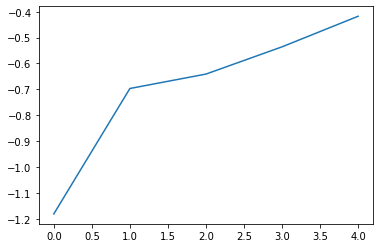

Accuracy : 0.8897058823529411, Loss -0.41733710436807847


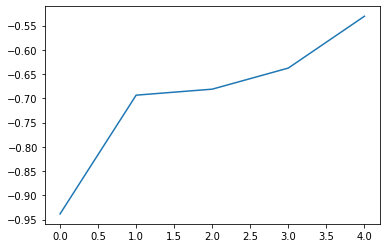

Accuracy : 0.8860294117647058, Loss -0.5309046446239674


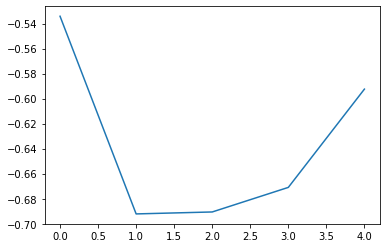

Accuracy : 0.875, Loss -0.5924056687407181


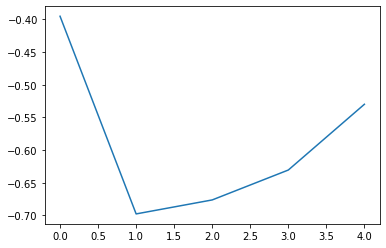

Accuracy : 0.8860294117647058, Loss -0.529832887008804


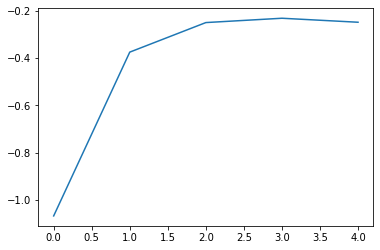

Accuracy : 0.8786764705882353, Loss -0.24820187834883456


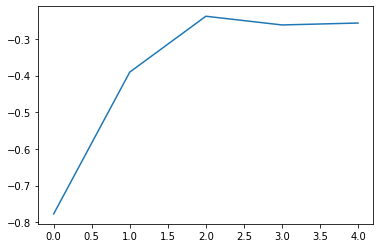

Accuracy : 0.8786764705882353, Loss -0.2569556944936071


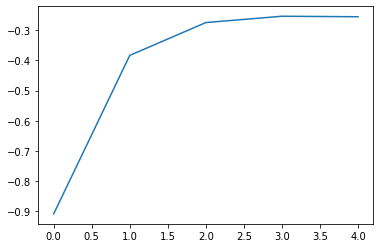

Accuracy : 0.8933823529411765, Loss -0.25578184217647815


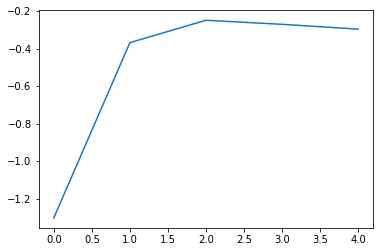

Accuracy : 0.8713235294117647, Loss -0.2964478063694728


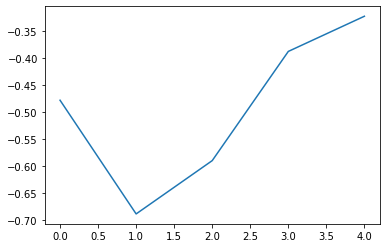

Accuracy : 0.8933823529411765, Loss -0.3224688480659905


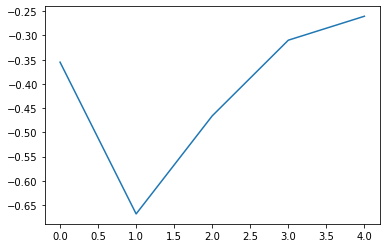

Accuracy : 0.8933823529411765, Loss -0.2603008561004161


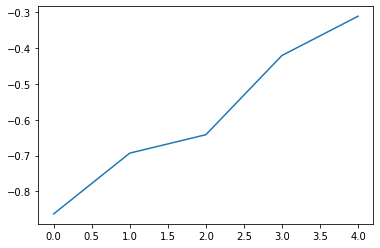

Accuracy : 0.8786764705882353, Loss -0.31079002683577844


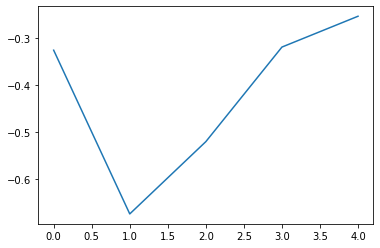

Accuracy : 0.875, Loss -0.253409859277998


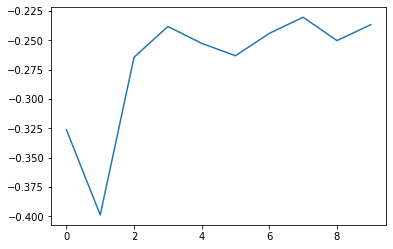

Accuracy : 0.9080882352941176, Loss -0.23686239983504384


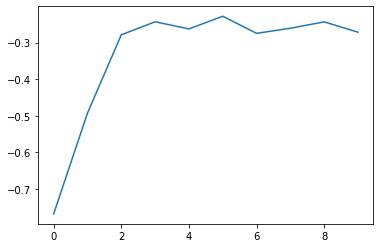

Accuracy : 0.8860294117647058, Loss -0.27147580724963044


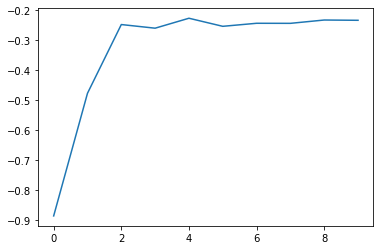

Accuracy : 0.9117647058823529, Loss -0.23314801252040995


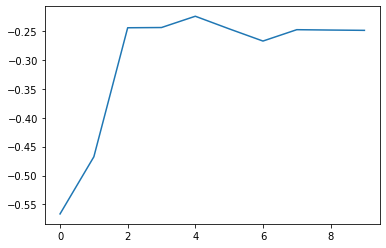

Accuracy : 0.8897058823529411, Loss -0.24895021697338188


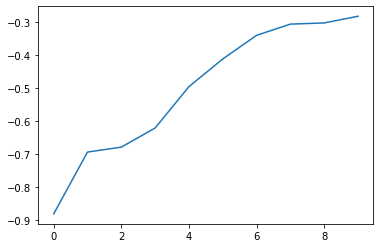

Accuracy : 0.8786764705882353, Loss -0.2834447599673258


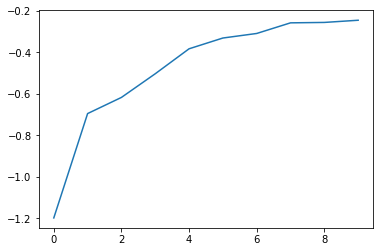

Accuracy : 0.8933823529411765, Loss -0.24542340553709868


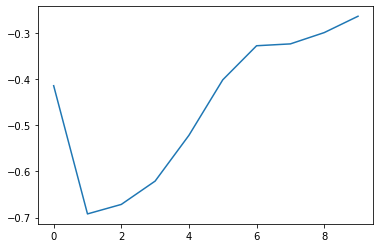

Accuracy : 0.8970588235294118, Loss -0.2635865024676471


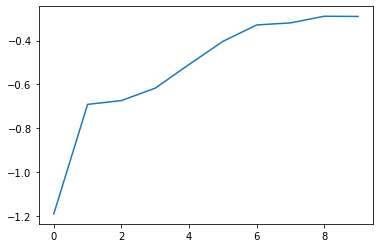

Accuracy : 0.8860294117647058, Loss -0.29028917007584587


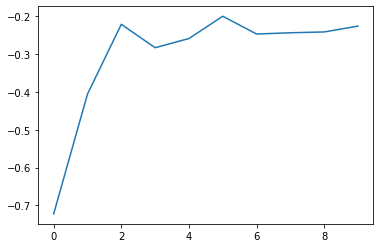

Accuracy : 0.8823529411764706, Loss -0.22561477649013062


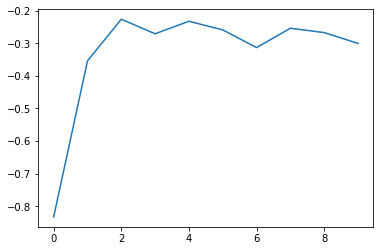

Accuracy : 0.9044117647058824, Loss -0.30018891301551326


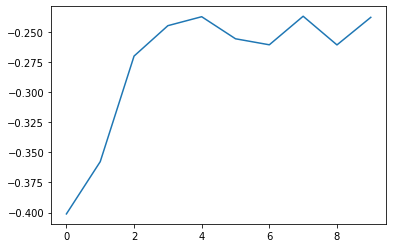

Accuracy : 0.8198529411764706, Loss -0.2380310176441713


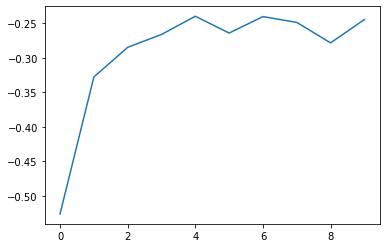

Accuracy : 0.9007352941176471, Loss -0.24451957677303277


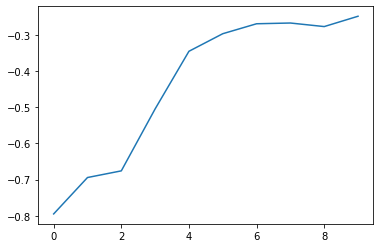

Accuracy : 0.8933823529411765, Loss -0.2479641379111722


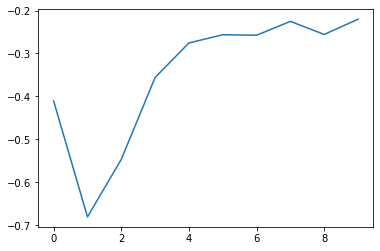

Accuracy : 0.8897058823529411, Loss -0.2201835267961478


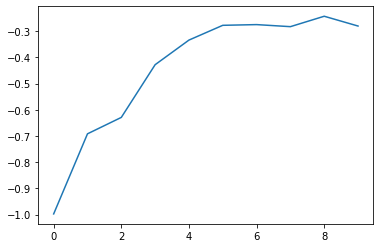

Accuracy : 0.8897058823529411, Loss -0.2800123973621037


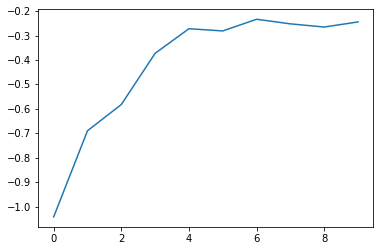

Accuracy : 0.8860294117647058, Loss -0.24434257134060552
(1000, 0.1, 2)


In [35]:
learning_rates = [0.1, 0.01, 0.2, 0.02]
max_iterations = [1000, 5000, 10000]
neurons = [2,4,5,10]
best_accuracy = 0
best_parameters_shallow = ()
for iteration in max_iterations:
    for lr in learning_rates:
    
        for n in neurons:
            model = shallow_nn(learning_rate=lr)
            model.fit(X_train_moons_scaled, y_train_moons, X_validation_moons_scaled, y_validation_moons,n, iteration)
            accuracy = model.accuracy(X_validation_moons_scaled, y_validation_moons)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_parameters_shallow = (iteration, lr, n)
print(best_parameters_shallow)

In [56]:
model_moon = shallow_nn(learning_rate=best_parameters_shallow[1])

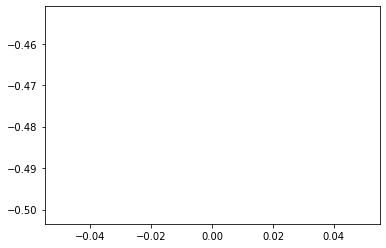

Accuracy : 0.8897058823529411, Loss -0.4772052058233951


In [57]:
model_moon.fit(X_train_moons_scaled, y_train_moons, X_validation_moons_scaled, y_validation_moons, 100, best_parameters_shallow[0])

In [58]:
model_moon.accuracy(X_test_moons_scaled, y_test_moons)

0.825

## Observations

In the shallow neural network, the linearly seperable data performs similar to the logistic regression as it is linearly seperable. However, key difference is in the moons dataset where their is an increase in the accuracy. The model has performed better when a hidden layer with back propogation is introduced.
**Cross validation** is performed to find the best parameters for the model. The model is trained on training data and tested on the validation data to check if it performed better if it is performing better, we save the parameters and use it in training and testing on the test dataset. **Early stopping** is also used to avoid overfitting of the model. The plot displalyed while fitting the model shows there is a descrease in loss at every 1000th iterations.

## Part 4

In part 4, I have loaded cifar dataset. The code to load cifar dataset is used from the code given by Dr. Micheal Madden. Cifar data contains data of 10 different classes, where I try to classify automobile and truck classes. For simplicity, I have used only red channel for training and testing data.

In [39]:
# This function taken from the CIFAR website

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Loaded in this way, each of the batch files contains a dictionary with the following elements:
#   data -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. 
#           The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. 
#           The image is stored in row-major order, so that the first 32 entries of the array are the red channel values 
#           of the first row of the image.
#   labels -- a list of 10000 numbers in the range 0-9. 
#             The number at index i indicates the label of the ith image in the array data.


In [40]:
def loadbatch(batchname):
    folder = 'cifar-10-batches-py'
    batch = unpickle(folder+"/"+batchname)
    return batch

In [41]:
def loadlabelnames():
    folder = 'cifar-10-batches-py'
    meta = unpickle(folder+"/"+'batches.meta')
    return meta[b'label_names']

In [42]:
batch1 = loadbatch('data_batch_1')
print("Number of items in the batch is", len(batch1))

# Display all keys, so we can see the ones we want
print('All keys in the batch:', batch1.keys())

Number of items in the batch is 4
All keys in the batch: dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


In [43]:
data = batch1[b'data']
labels = batch1[b'labels']
print ("size of data in this batch:", len(data), ", size of labels:", len(labels))
print (type(data))
print(data.shape)

names = loadlabelnames()

size of data in this batch: 10000 , size of labels: 10000
<class 'numpy.ndarray'>
(10000, 3072)


In [44]:
## loading data of only automobile and truck labels and changing the labels to 0 and 1

X_cifar = []
y_cifar = []
for i in range(len(data)):
    if labels[i] == 1 or labels[i] == 9:
        X_cifar.append(data[i])
        if(labels[i] == 1):
            y_cifar.append(0)
        else:
            y_cifar.append(1)

In [45]:
X_cifar = np.array(X_cifar)[:,:1024]
y_cifar = np.array(y_cifar)

In [46]:
# dividing traing and testing data
X_train_cifar, X_test_cifar, y_train_cifar, y_test_cifar = train_test_split(X_cifar, y_cifar, test_size= 0.15, random_state = 0)

In [47]:
# dividing in training and validation data
X_train_cifar, X_validation_cifar, y_train_cifar, y_validation_cifar = train_test_split(X_train_cifar, y_train_cifar, test_size= 0.15, random_state = 0)

In [48]:
X_train_cifar_scaled = X_train_cifar / 255
X_validation_cifar_scaled = X_validation_cifar / 255
X_test_cifar_scaled = X_test_cifar / 255

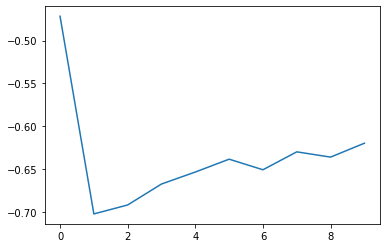

Accuracy : 0.6683203401842664, Loss -0.6198748418449311
Test Accuracy 0.6360544217687075


In [49]:
model = shallow_nn(learning_rate=0.01)
model.fit(X_train_cifar_scaled, y_train_cifar, X_validation_cifar_scaled, y_validation_cifar, 50, 10000)
accuracy = model.accuracy(X_test_cifar_scaled, y_test_cifar)
print("Test Accuracy", accuracy)

## Observations

While working with the cifar dataset to identify two classes, the model does not produce very good results as compared to moons and blob dataset. The parameters chosen for the model are 10000 iterations, 0.01 learning rate and 50 neurons. The accuracy achieved on training data is 73% and on test 68%. I have also tried increasing the iterations as well as the number of neurons but no significant results were achieved.

# Part 5

In part 5, for optimization I have implemented leaku relu activation function as compared to sigmoid in part 3. Also as an optimization I have implemented momentum with backpropogation.

Momentum with backpropogation - It is used to calculate the moving average of the gradients, and later it is used to update the weights of the network.

Leaky relu - In leaky relu, we take max of the input and 0.01. That means, if the value of input is negative, it gives 0.01 and otherwise the value that was given as input.

In [50]:
'''
below class inherits above class(shallow_nn) from part3 and reuses the methods which are 
similar in both the classes
'''

class shallow_nn_relu(shallow_nn):
    def __init__(self, learning_rate = 0.01):
        self.learning_rate = learning_rate
        self.weights = None
        self.bias = None
        self.neurons = 0
        self.loss_threshold = 1e-6
        self.mean = 0
        self.sd = 0
        
    def sgd(self, X, y, x_validation, y_validation, max_iterations):
        prev_loss = 0
        acc = 0
        saved_weights = self.weights
        saved_bias = self.bias
        saved_output_weights = self.output_weights
        saved_output_bias = self.output_bias
        # initalizing values for momentum
        v_delta_w = v_delta_b = v_delta_output_weight = v_delta_output_bias = 0
        beta1 = 0.9
        loss_list = []
        loss_list_1 = []
        for i in range(max_iterations):

            index = np.random.randint(X.shape[0])
            X_sgd = np.array(X[index])
            y_sgd = np.array(y[index])
            
            #calculating weighted sum 
            # forward pass of the sgd
            w_sum = np.dot(X_sgd, self.weights.T) + self.bias
            activation = self.leaky_relu(np.array(w_sum))

            w_sum_output = np.dot(np.array(activation), self.output_weights) + self.output_bias

            activation_output = self.sigmoid(w_sum_output)

            loss = self.log_loss(y[index], activation_output)
            loss_list.append(loss)
            
            if i % 1000 == 0:
                loss_list_1.append(np.mean(loss_list))
                loss_list = []
            
            # calculating deriavative of output layer
            delta_w_sum_output = activation_output - y[index]

            delta_output_weight = []

            delta_output_weight = delta_w_sum_output * activation

            delta_output_bias = delta_w_sum_output

            delta_w_sum = []

            ## calculating deriavative for leaky relu
            der = []
            for i in w_sum:
                if i >= 0:
                    der.append(1)
                else:
                    der.append(0.01)
            der = np.array(der)
            
            # performing backpropogation 
            delta_w_sum = der * (delta_w_sum_output * self.output_weights)

            delta_w_sum_array = np.array(delta_w_sum)
            delta_w_sum_matrix = np.matrix(delta_w_sum)
            
            #calculating deriavative for weights and bias
            delta_weight = delta_w_sum_matrix.T * X_sgd
            delta_bias = delta_w_sum_array
            delta_output_weight = np.array(delta_output_weight)
            delta_output_bias = np.array(delta_output_bias)

            if i == 0:
                v_delta_w = delta_weight
                v_delta_b = delta_bias
                v_delta_output_weight = delta_output_weight
                v_delta_output_bias = delta_output_bias
            
            # calculating momentum on the backprop
            v_delta_w = (1 - beta1) * delta_weight + beta1 * v_delta_w
            v_delta_b = (1 - beta1) * delta_bias + beta1 * v_delta_b
            v_delta_output_weight = (1 - beta1) * delta_output_weight + beta1 * v_delta_output_weight
            v_delta_output_bias = (1 - beta1) * delta_output_bias + beta1 * v_delta_output_bias
            
            #updating weights and bias
            self.weights -= self.learning_rate * v_delta_w
            self.bias -= self.learning_rate * v_delta_b
            self.output_weights -= (self.learning_rate * v_delta_output_weight)
            self.output_bias -= (self.learning_rate * v_delta_output_bias)


            # value of iteration is monitored and checked for early stopping. Only the best parameters
            # giving best results on the validation set are chosen. This helps in preventing 
            # overfitting of the model.

            if i % 1000 == 0:
                acc_validation = self.accuracy(x_validation, y_validation)
                if acc_validation > acc:
                    acc = acc_validation
                    saved_weights = self.weights
                    saved_bias = self.bias
                    saved_output_weights = self.output_weights
                    saved_output_bias = self.output_bias

        self.weights = saved_weights
        self.bias = saved_bias
        self.output_weights = saved_output_weights
        self.output_bias = saved_output_bias

        return  loss_list_1

    '''
    leaky relu is implemented to use as an activation function for the hidden layers
    '''
    def leaky_relu(self, z):
        relu_out = []
        for i in z:
            relu_out.append(max(0.01 * i, i))
        return np.array(relu_out)

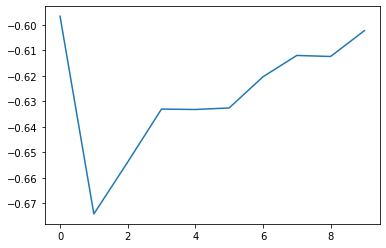

Accuracy : 0.5988660524450744, Loss -0.6022189496211192
Test accuracy  0.5578231292517006


In [51]:
model = shallow_nn_relu(learning_rate=0.01)
model.fit(X_train_cifar_scaled, y_train_cifar, X_validation_cifar_scaled, y_validation_cifar, 50, 10000)
accuracy = model.accuracy(X_test_cifar_scaled, y_test_cifar)
print("Test accuracy ", accuracy)

## Observations

For enhancements in neural network I have implemented leaky relu activation function with momentum. There is no significant improvement in the scores of the model. The model gives a training accuracy of 73% and testing accuracy of 64%. Leaky relu is used as an activation function for the hidden layer and sigmoid is used for the output layer. Other optimizations could be performed like adding more hidden layers to the network, adding dropout layer. The plot displalyed while fitting the model shows there is a descrease in loss at every 1000th iterations.

#### References
- Lecture Notes
- https://numpy.org/